# Decision Tree from Scratch

# 1- Importing key Modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import random
from pprint import pprint
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
# helper file
import decision_tree_algorithm

# 2- Load Data and prepare data

In [4]:
df= pd.read_csv('iris.csv')
df.rename(columns={"species":"label"},inplace=True)
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

### 2.1.train-test split

In [8]:
import decision_tree_algorithm
from decision_tree_algorithm import train_test_split

In [9]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [10]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)
print(train_df.shape)
print(test_df.shape)

(130, 5)
(20, 5)


In [11]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,versicolor
107,7.3,2.9,6.3,1.8,virginica
10,5.4,3.7,1.5,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica


# 3-Helper Functions

- As per Sebastian Mantey

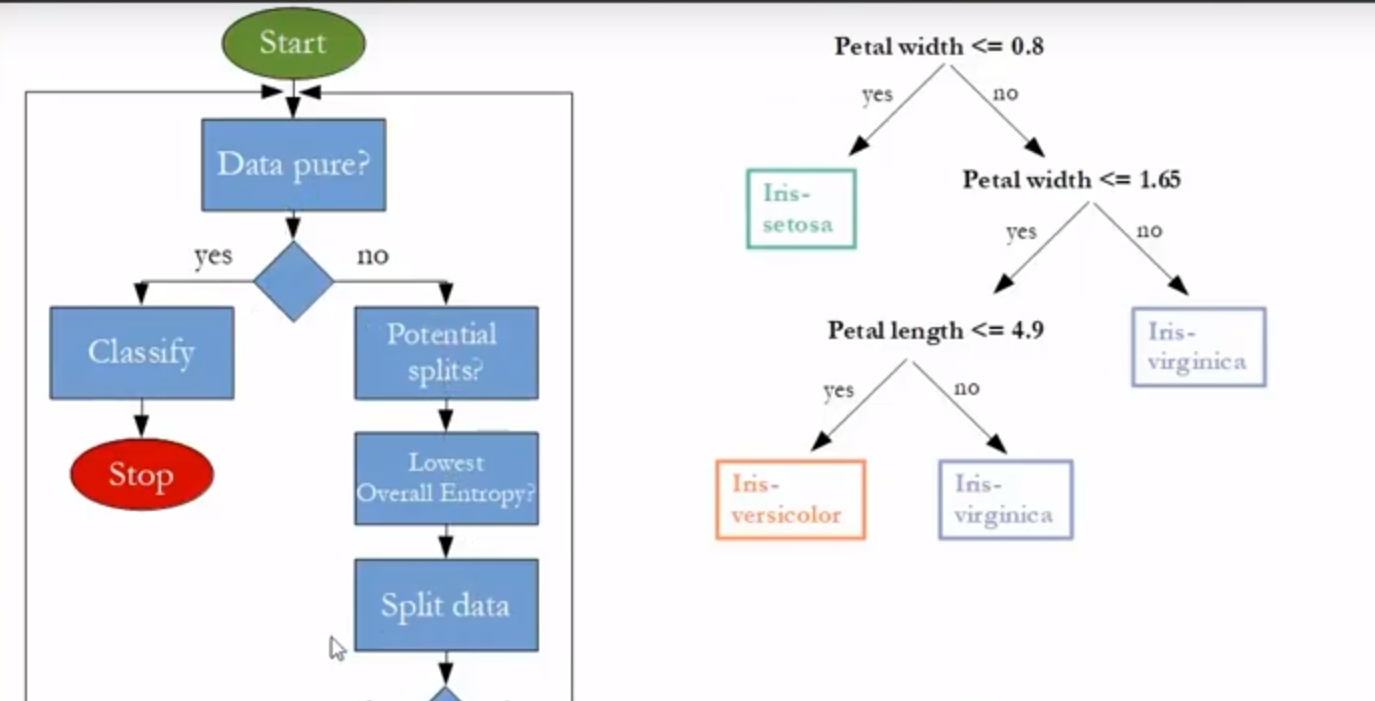

In [13]:
from IPython.display import Image
Image("1.png")

In [14]:
data=train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

In [15]:
type(data)

numpy.ndarray

In [16]:
label_column = data[:, -1]
unique_classes = np.unique(label_column)
unique_classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 3.1. Data pure

check balance of class in split done above

In [17]:
label_column = data[:, -1]
label_column[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [18]:
label_column = data[:, -1]
unique_classes = np.unique(label_column)
unique_classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
len(unique_classes)

3

In [20]:
#creating a function for purity check
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [21]:
# apply function to data. Give only numpy 2-d array


check_purity(train_df.values)

False

In [22]:
train_df[train_df.petal_width < 0.8].head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
width_check=train_df[train_df.petal_width < 0.8]
width_check.label.value_counts()

setosa    46
Name: label, dtype: int64

In [24]:
check_purity(train_df[train_df.petal_width < 0.8].values)

True

In [25]:
train_df[train_df.petal_width > 0.8].head()

,sepal_length,sepal_width,petal_length,petal_width,label
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [26]:
width_check2=train_df[train_df.petal_width > 0.8]
width_check2.label.value_counts()

virginica     42
versicolor    42
Name: label, dtype: int64

In [27]:
check_purity(train_df[train_df.petal_width > 0.8].values)

False

Hence , any time we have more than two classes we shall get an error. Because two classes cannot occur at same one instance.

### 3.2. classify

In [28]:
label_column = data[:, -1]
label_column[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [29]:
classification = label_column[0]
classification

'setosa'

In [30]:
np.unique(label_column, return_counts=True) # equivalent to value_count

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([46, 42, 42], dtype=int64))

In [31]:
unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
print(unique_classes)
print(counts_unique_classes)

['setosa' 'versicolor' 'virginica']
[46 42 42]


In [32]:
counts_unique_classes.argmax()

0

Argmax is an operation that finds the argument that gives the maximum value from a target function. Argmax is most commonly used in machine learning for finding the class with the largest predicted probability.

In [33]:
index=counts_unique_classes.argmax()
unique_classes[index]

'setosa'

In [34]:
unique_classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [36]:
classify_data(train_df[train_df.petal_width < 1.2 ].values)

'setosa'

In [37]:
train_df[train_df.petal_width < 1.2 ]

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Majority is setosa so , we get that as an output

### 3.3.Potential splits

In [38]:
potential_splits = {}
_, n_columns = data.shape
for column_index in range(n_columns - 1):        # excluding the last column which is the label
    potential_splits[column_index] = []
    values = data[:, column_index]
    unique_values = np.unique(values)

    for index in range(len(unique_values)):
        if index != 0:
            current_value = unique_values[index]
            previous_value = unique_values[index - 1]
            potential_split = (current_value + previous_value) / 2
                
            potential_splits[column_index].append(potential_split)

In [39]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

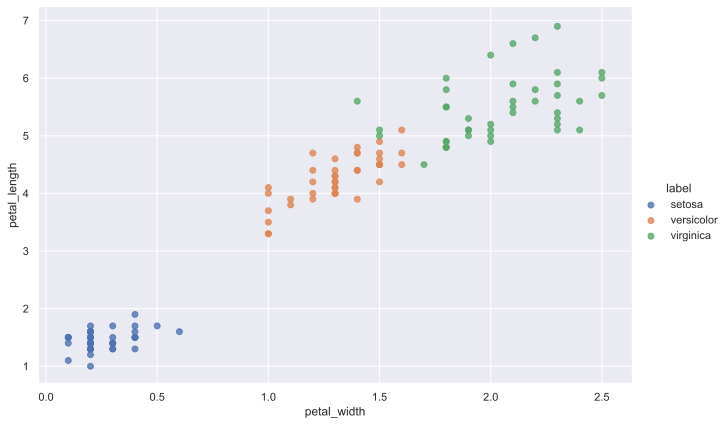

In [40]:
sns.lmplot(data=train_df , x="petal_width", y="petal_length", hue="label",
            fit_reg=False , size=6 , aspect=1.5)

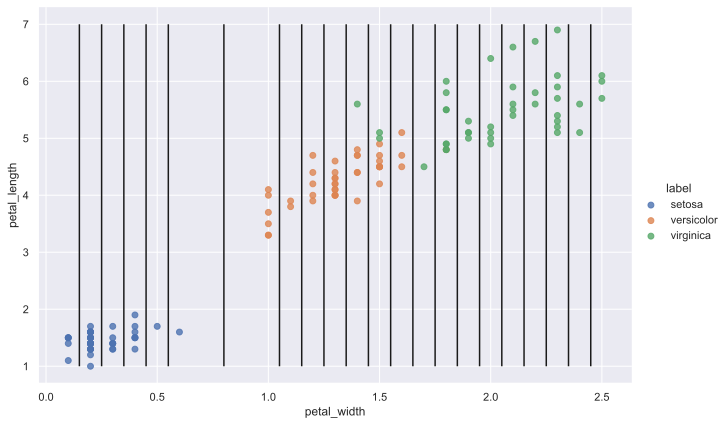

In [41]:
sns.lmplot(data=train_df , x="petal_width", y="petal_length", hue="label",
            fit_reg=False , size=6 , aspect=1.5)
plt.vlines(x=potential_splits[3], ymin=1 , ymax=7)

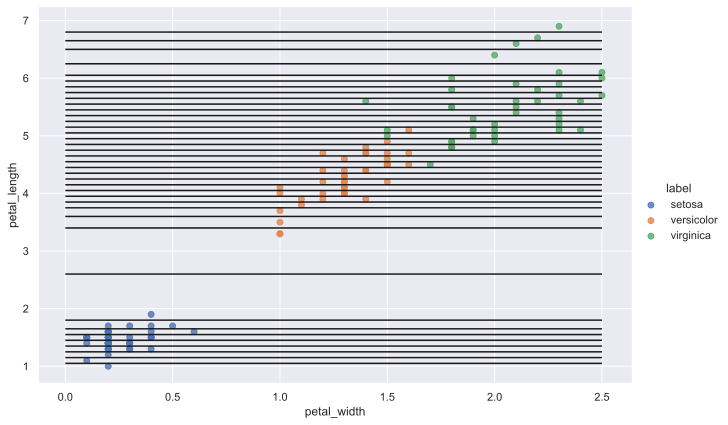

In [42]:
sns.lmplot(data=train_df , x="petal_width", y="petal_length", hue="label",
            fit_reg=False , size=6 , aspect=1.5)
plt.hlines(y=potential_splits[2] , xmin=0 ,xmax=2.5)

### 3.4.Split Data

In [43]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

### 3.5.Lowest Overall Entropy

Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.The higher the entropy, the harder it is to draw any conclusions from that information.

Higher the probability , lower is the uncertainty i.e Entropy

In [44]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [45]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [46]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# 4- Main Algorithm

### Representation of the Decision Tree

In [47]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'], dtype='object')

In [48]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [49]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

### Determine Type of Feature

In [50]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15 #we can cange if categories count is higher than 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

### algorithm

In [51]:
#main algorith i.e decision tree function
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [52]:
tree = decision_tree_algorithm(train_df)
pprint(tree)

{'petal_width <= 0.6': ['setosa',
                        {'petal_width <= 1.6': [{'petal_length <= 4.9': ['versicolor',
                                                                         {'petal_width <= 1.5': ['virginica',
                                                                                                 'versicolor']}]},
                                                {'petal_length <= 4.8': [{'sepal_width <= 3.0': ['virginica',
                                                                                                 'versicolor']},
                                                                         'virginica']}]}]}


# 5-Classification

In [53]:
sub_tree

{'question': ['yes_answer', 'no_answer']}

In [54]:
# 1st sample as example
example = test_df.iloc[0]
example

sepal_length           5.1
sepal_width            2.5
petal_length             3
petal_width            1.1
label           versicolor
Name: 98, dtype: object

In [55]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [56]:
classify_example(example, tree)

'versicolor'

In [57]:
# use another 
example2= test_df.iloc[6]
classify_example(example2, tree)

'virginica'

# 6-Calculate Accuracy

In [58]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [59]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.9

# 7)- Running full model


as of taking from pycharm

In [60]:
train_df , test_df= train_test_split(df , test_size=0.2)
tree=decision_tree_algorithm(train_df , max_depth =3)
accuracy= calculate_accuracy(test_df , tree)

In [61]:
print(tree)

{'petal_width <= 0.6': ['setosa', {'petal_length <= 4.8': [{'petal_width <= 1.6': ['versicolor', 'virginica']}, 'virginica']}]}


In [62]:
print(accuracy)

0.9


# 8)- titanic data

In [63]:
df = pd.read_csv("titanic.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df["label"] = df.Survived
df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
print(df.shape)
df.head()

(891, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [65]:
# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})
print(df.shape)

(891, 8)


In [66]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
label       0
dtype: int64

In [67]:
#train-test split
random.seed(0)

train_df, test_df = train_test_split(df, 0.2)
print(train_df.shape)
print(test_df.shape)

(713, 8)
(178, 8)


In [68]:
#this is with three layers
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree, width=50)

{'Sex = male': [{'Fare <= 9.4833': [0,
                                    {'Age <= 6.0': [1,
                                                    0]}]},
                {'Pclass = 3': [{'Fare <= 24.15': [1,
                                                   0]},
                                1]}]}


In [69]:
accuracy = calculate_accuracy(test_df, tree)

print(accuracy)

0.7752808988764045


In [70]:
#with 10 layers
tree = decision_tree_algorithm(train_df, max_depth=10)
pprint(tree, width=50)
accuracy = calculate_accuracy(test_df, tree)

print(accuracy)

{'Sex = male': [{'Fare <= 9.4833': [{'Age <= 32.0': [{'Age <= 30.5': [{'Fare <= 7.7958': [{'Fare <= 7.7417': [{'Fare <= 7.2292': [{'Age <= 27.0': [{'Age <= 25.0': [0,
                                                                                                                                                                    1]},
                                                                                                                                                   0]},
                                                                                                                                  0]},
                                                                                                              {'Age <= 19.0': [0,
                                                                                                                               {'Age <= 21.0': [1,
                                                                                                    